<div style="border:solid green 2px; padding: 20px">
Юля, привет и хорошего дня! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать. 

Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например так</div>

# Телеком

Оператор связи *"Ниединогоразрыва.ком"* хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Цель проекта
**Разработать модель машинного обучения бинарной классификации, которая по различным характеристикам клиента сможет прогнозировать, планирует ли клиент расторгнуть контракт и отказать от услуг телекоммуникационного оператора.**

### Методология проекта
1. Загрузить данные, понять содержание данные, соединить в единый датасет.
2. Изучить предложенные данные, заполнить пропуски, проверить данные на дубликаты (явные и неявные). Подготовить данные к дальнейшему анализу.
3. Проверить корреляционную зависимость, исключить столбцы с признаками, которые имеют коэффициенты корреляции Пирсона выше 0.8.
4. Изучить значение целевого признака, проверить на наличие в нем дисбаланса.
5. Разработать и обучить неколько моделей машинного обучения для решения задачи бинарной классификации. Выбрать наилучшую модель по метрике качества с помощью поиска по сетке или кросс-валидации, протестировать модель на тестовых данных. При разработке модели учитывать проблему переобучения; провести масштабирование и нормализацию признаков, где необходимо.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (*DSL*, от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

*Описание проекта в Notion [здесь](https://concrete-web-bad.notion.site/20b6db57bf464afe86232e26190285e5).*

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично, название проекта и описание на месте, ссылку на Notion лучше удалить, т.к. не у всех есть доступ </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Предусмотри, пожалуйста, установку сторонних библиотек, так же не советую использовать профайлинг, т.к. это может приводить к падению ядра на стороне сервера яндекса </div>

In [1]:
pip install -q --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q dill

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import dill as pickle

from joblib import Parallel, delayed
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import fbeta_score, make_scorer, classification_report, roc_curve, confusion_matrix, roc_auc_score, accuracy_score, f1_score
from statsmodels.tools.tools import add_constant
%matplotlib inline

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None

## 1 Загрузка данных, преобработка данных

In [4]:
RANDOM_STATE = 300123

### 1.1 Загрузка данных

- ####  `contract`

In [5]:
# read the file handling exceptions
try:
    contract = pd.read_csv('/Users/yuliabezginova/PycharmProjects/00_files-for_NLP/final_provider/contract.csv') #, index_col=[0])
except FileNotFoundError:
    contract = pd.read_csv('/datasets/final_provider/contract.csv') #, index_col=[0])

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: предусмотри, пожалуйста, выполнение кода на стороне яндекса(try...except) Путь к файлам в тренажере <code>/datasets/final_provider/</code> Так же стоит комментировать проводимый анализ</div>

<div class="alert alert-info"> <b>Юлия:</b>
Подскажите, пожалуйста, какие сторонние библиотеки у вас не установлены, я пропишу их установку.
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера V2:
&#9989;</b> Теперь все работает! </div>

In [6]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [8]:
contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [9]:
round(len(contract[contract['EndDate'] == 'No']) / len(contract) * 100, 2)

73.46

In [10]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Создадим временный датасет с двумя колонками ID клиента и статус окончания использования контрактом EndDate.

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Мне кажется это лишнее, не проще добавить столбец?
</div>

In [11]:
temp = contract[['customerID', 'EndDate']].copy()
temp

,customerID,EndDate
0,7590-VHVEG,No
1,5575-GNVDE,No
2,3668-QPYBK,2019-12-01 00:00:00
3,7795-CFOCW,No
4,9237-HQITU,2019-11-01 00:00:00
...,...,...
7038,6840-RESVB,No
7039,2234-XADUH,No
7040,4801-JZAZL,No
7041,8361-LTMKD,2019-11-01 00:00:00


In [12]:
churned = temp[temp['EndDate'] == 'No']
churned.head()

,customerID,EndDate
0,7590-VHVEG,No
1,5575-GNVDE,No
3,7795-CFOCW,No
6,1452-KIOVK,No
7,6713-OKOMC,No


In [13]:
churned['churned'] = int(1)
churned.drop(columns=['EndDate'])

,customerID,churned
0,7590-VHVEG,1
1,5575-GNVDE,1
3,7795-CFOCW,1
6,1452-KIOVK,1
7,6713-OKOMC,1
...,...,...
7037,2569-WGERO,1
7038,6840-RESVB,1
7039,2234-XADUH,1
7040,4801-JZAZL,1


In [14]:
j = churned.merge(contract[['customerID', 'BeginDate', 'EndDate', 'Type', 
                            'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 
                            'TotalCharges']], how='right', on='customerID')
j.shape

(7043, 10)

In [15]:
j['churned'].unique()

array([ 1., nan])

In [16]:
j['churned'].isnull().sum()

1869

In [17]:
contract_adj = j.copy()
contract_adj.head(3)

,customerID,EndDate_x,churned,BeginDate,EndDate_y,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,1.0,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,No,1.0,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,NaN,NaN,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15


In [18]:
contract_adj = contract_adj.drop(columns=['EndDate_x'])

In [19]:
contract_adj.head(3)

,customerID,churned,BeginDate,EndDate_y,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,1.0,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,1.0,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,NaN,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15


In [20]:
contract_adj.rename(columns = {'EndDate_y':'EndDate'}, inplace = True)

In [21]:
contract_adj.head(3)

,customerID,churned,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,1.0,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,1.0,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,NaN,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15


In [22]:
contract_adj['churned'] = contract_adj['churned'].fillna(0)
contract_adj.min()

customerID                         0002-ORFBO
churned                                   0.0
BeginDate                          2013-10-01
EndDate                   2019-10-01 00:00:00
Type                           Month-to-month
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          18.25
TotalCharges                                 
dtype: object

In [23]:
# Код ревьюера
contract_adj.isna().sum()

customerID          0
churned             0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [24]:
contract_adj.tail(3)

,customerID,churned,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7040,4801-JZAZL,1.0,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,0.0,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,1.0,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Не совсем понятно, зачем нужна строка выше, если пропусков нет, так же здесь и далее: заполнение пропусков интерполяцией в этом проекте не корректно, пропуски в услугах означают их отсутствие(у те</div>

<div class="alert alert-info"> <b>Юлия:</b>
Убрала.
</div>


In [25]:
contract_adj['begin_date'] = pd.to_datetime(contract_adj['BeginDate']).dt.date

In [26]:
contract_adj.loc[contract_adj['EndDate'] == 'No', 'EndDate'] = pd.to_datetime('2020-02-01')
contract_adj.min()

customerID                         0002-ORFBO
churned                                   0.0
BeginDate                          2013-10-01
Type                           Month-to-month
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          18.25
TotalCharges                                 
begin_date                         2013-10-01
dtype: object

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Обрати, пожалуйста, внимание на end_date (во что преобразуются нули)Здесь пропуски лучше заполнить датой выгрузки из бд</div>

<div class="alert alert-info"> <b>Юлия:</b>
Заполнила датой 01/02/2020.
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера V2:
&#9989;</b> Отлично! </div>

In [27]:
contract_adj['end_date'] = pd.to_datetime(contract_adj['EndDate']).dt.date

In [28]:
contract_adj.head(5)

,customerID,churned,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,begin_date,end_date
0,7590-VHVEG,1.0,2020-01-01,2020-02-01 00:00:00,Month-to-month,Yes,Electronic check,29.85,29.85,2020-01-01,2020-02-01
1,5575-GNVDE,1.0,2017-04-01,2020-02-01 00:00:00,One year,No,Mailed check,56.95,1889.5,2017-04-01,2020-02-01
2,3668-QPYBK,0.0,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2019-10-01,2019-12-01
3,7795-CFOCW,1.0,2016-05-01,2020-02-01 00:00:00,One year,No,Bank transfer (automatic),42.30,1840.75,2016-05-01,2020-02-01
4,9237-HQITU,0.0,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2019-09-01,2019-11-01


In [29]:
contract_adj.shape

(7043, 11)

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь вылетает ошибка</div>

<div class="alert alert-info"> <b>Юлия:</b>
Поправила.
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера V2:
&#9989;</b> Отлично! </div>

In [30]:
contract_adj.describe()

,churned,MonthlyCharges
count,7043.000000,7043.000000
mean,0.734630,64.761692
std,0.441561,30.090047
min,0.000000,18.250000
25%,0.000000,35.500000
50%,1.000000,70.350000
75%,1.000000,89.850000
max,1.000000,118.750000


In [31]:
# contract_final = contract_adj.query('year_end != 1970')

In [32]:
# contract_final[contract_final['year_end'] == 1970]

In [33]:
# data['Tenure'] = data['Tenure'].fillna(data.groupby('Balance')['Tenure'].transform('median'))
# data['Tenure'].isna().sum() / len(data)

In [34]:
contract_adj.isnull().sum()

customerID          0
churned             0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
begin_date          0
end_date            0
dtype: int64

In [35]:
contract_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   churned           7043 non-null   float64
 2   BeginDate         7043 non-null   object 
 3   EndDate           7043 non-null   object 
 4   Type              7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   PaymentMethod     7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7043 non-null   object 
 9   begin_date        7043 non-null   object 
 10  end_date          7043 non-null   object 
dtypes: float64(2), object(9)
memory usage: 660.3+ KB


In [36]:
# изменим тип данных, где приведены целочисленные значения
contract_adj['churned'] = contract_adj['churned'].astype('int')

In [37]:
contract_adj['TotalCharges'] = np.floor(pd.to_numeric(contract_adj['TotalCharges'], errors='coerce')).astype('float64')

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Не совсем понятно зачем здесь округление, поясни, пожалуйста</div>

<div class="alert alert-info"> <b>Юлия:</b>
    
Округления здесь нет.
    
- churned имеет тип переменной float, но так как это бинарная переменная, я перевожу в int();
- TotalCharges имеет тип переменной object, но является числом с двумя знаками после запятой, поэтому перевожу в тип float64.
</div>


In [38]:
contract_adj = contract_adj.drop(columns=['BeginDate'])
contract_adj = contract_adj.drop(columns=['EndDate'])

In [39]:
contract_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   churned           7043 non-null   int64  
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   begin_date        7043 non-null   object 
 8   end_date          7043 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.2+ KB


In [40]:
contract_adj.columns[contract_adj.isnull().any()]

Index(['TotalCharges'], dtype='object')

### *Вывод `contract`:* В данных создана отдельная колонка бинарного целевого признака со значениями 0, 1 в зависимости от того, являлся ли клиент действующим или нет. Решение было принято на основе наличия конечной даты контакта в исходных данных `EndDate`. Также были изменены типы переменных, вместо исходных колонок с датой начало и окончаения контракта в разных форматах, были созданы две новые колонки в едином формате даты. Финальная версия данных `contract` содержит 9 признаков (включая целевой) и 7043 наблюдения и готова к дальнейшему использованию. В колонке `TotalCharges` содержатся пропущенные значения. 

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

- ####  `internet`

In [41]:
# read the file handling exceptions
try:
    internet = pd.read_csv('/Users/yuliabezginova/PycharmProjects/00_files-for_NLP/final_provider/internet.csv') #, index_col=[0])
except FileNotFoundError:
    internet = pd.read_csv('/datasets/final_provider/internet.csv') #, index_col=[0])

In [42]:
internet.head(3)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No


In [43]:
# проверка на пропущенные значения и дубликаты
internet.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [44]:
internet.columns[internet.isnull().any()]

Index([], dtype='object')

In [45]:
# проверка на аномалии в категориях
internet['InternetService'].unique()

array(['DSL', 'Fiber optic'], dtype=object)

In [46]:
internet['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [47]:
internet['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [48]:
internet['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
internet['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [50]:
internet['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
internet['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

### *Вывод:* Данные `internet` содержат категориальные переменные, не содержат пропусков. Аномальных значений в категориях не обнаружено. Данные готовы к дальнейшему анализу.

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

- ####  `personal`

In [52]:
# read the file handling exceptions
try:
    personal = pd.read_csv('/Users/yuliabezginova/PycharmProjects/00_files-for_NLP/final_provider/personal.csv') #, index_col=[0])
except FileNotFoundError:
    personal = pd.read_csv('/datasets/final_provider/personal.csv') #, index_col=[0])

In [53]:
personal.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


In [54]:
# проверка на пропущенные значения и дубликаты
personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [55]:
personal['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [56]:
personal['SeniorCitizen'].unique()

array([0, 1])

In [57]:
personal['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [58]:
personal['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

### *Вывод:* Данные `personal` содержат категориальные переменные, не содержат пропусков. Аномальных значений в категориях не обнаружено. Данные готовы к дальнейшему анализу.

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

- ####  `phone`

In [59]:
# read the file handling exceptions
try:
    phone = pd.read_csv('/Users/yuliabezginova/PycharmProjects/00_files-for_NLP/final_provider/phone.csv') #, index_col=[0])
except FileNotFoundError:
    phone = pd.read_csv('/datasets/final_provider/phone.csv') #, index_col=[0])

In [60]:
phone.head(3)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


In [61]:
# проверка на пропущенные значения и дубликаты
phone.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

### *Вывод:* Данные `phone` содержат категориальные переменные, не содержат пропусков. Аномальных значений в категориях не обнаружено. Данные готовы к дальнейшему анализу.

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

### *Общий вывод:* Все четыре датасета подготовлены к дальнейшему анализу.

## 2 Исследовательский анализ данных
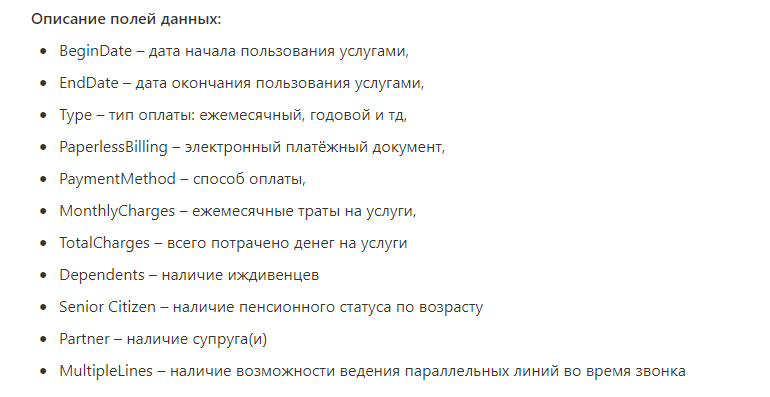

### 2.1 Подготовка финального датасета

In [62]:
df_1 = contract_adj.merge(personal, on='customerID', how='left')
df_2 = df_1.merge(phone, on='customerID', how='left')
df = df_2.merge(internet, on='customerID', how='left')

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Также вылетает ошибка, переменная не объявлена</div>

<div class="alert alert-info"> <b>Юлия:</b>
Поправила.
</div>


In [63]:
df.shape

(7043, 21)

In [64]:
df.head(3)

,customerID,churned,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,begin_date,end_date,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.0,2020-01-01,2020-02-01,Female,...,Yes,No,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,1,One year,No,Mailed check,56.95,1889.0,2017-04-01,2020-02-01,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,0,Month-to-month,Yes,Mailed check,53.85,108.0,2019-10-01,2019-12-01,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   churned           7043 non-null   int64  
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   begin_date        7043 non-null   object 
 8   end_date          7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     6361 non-null   object 
 14  InternetService   5517 non-null   object 
 15  OnlineSecurity    5517 non-null   object 
 16  OnlineBackup      5517 non-null   object 


### 2.2 Обработка пропусков

In [66]:
# df = df.fillna(df.interpolate())
# df.isnull().sum()

In [70]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
customerID,0.000000
churned,0.000000
Type,0.000000
PaperlessBilling,0.000000
PaymentMethod,0.000000
MonthlyCharges,0.000000
TotalCharges,0.000000
begin_date,0.000000
end_date,0.000000
gender,0.000000


In [71]:
df.columns[df.isnull().any()]

Index(['TotalCharges', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

### *Вывод:* В колонке ```MultipleLines``` пропуски в данных занимают менее 10% объема наблюдений, их можно безопасно удалить, но лучше поставить заглушку ввиду небольшого объема данных. Пропуски в колонках ```InternetService```, ```OnlineSecurity```, ```OnlineBackup```, ```DeviceProtection```, ```TechSupport```, ```StreamingTV```, ```StreamingMovies``` необходимо заполнить.

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: не стоит удалять данные, у нас их не так много. Пропуски в даных обозначают отсутствие услуги, у тебя есть значения 'No', лучше заполнить пропуски этой заглушкой</div>

<div class="alert alert-info"> <b>Юлия:</b>
Поправила.
</div>

In [97]:
df_v1 = df.copy()

In [76]:
df_v1['MultipleLines'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [77]:
df_v1['MultipleLines'].isna().sum() / len(df_v1)

0.09683373562402385

In [78]:
df_v1['InternetService'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [79]:
df_v1['InternetService'].isna().sum() / len(df_v1)

0.21666903308249325

In [80]:
df_v1['OnlineSecurity'].unique()

array(['No', 'Yes', nan], dtype=object)

In [81]:
df_v1['OnlineSecurity'].isna().sum() / len(df_v1)

0.21666903308249325

In [82]:
df_v1['OnlineBackup'].unique()

array(['Yes', 'No', nan], dtype=object)

In [83]:
df_v1['OnlineBackup'].isna().sum() / len(df_v1)

0.21666903308249325

In [84]:
df_v1['DeviceProtection'].unique()

array(['No', 'Yes', nan], dtype=object)

In [85]:
df_v1['DeviceProtection'].isna().sum() / len(df_v1)

0.21666903308249325

In [86]:
df_v1['TechSupport'].unique()

array(['No', 'Yes', nan], dtype=object)

In [87]:
df_v1['TechSupport'].isna().sum() / len(df_v1)

0.21666903308249325

In [88]:
df_v1['StreamingTV'].unique()

array(['No', 'Yes', nan], dtype=object)

In [89]:
df_v1['StreamingTV'].isna().sum() / len(df_v1)

0.21666903308249325

In [90]:
df_v1['StreamingTV'].unique()

array(['No', 'Yes', nan], dtype=object)

In [91]:
df_v1['StreamingTV'].isna().sum() / len(df_v1)

0.21666903308249325

In [92]:
df_v1['StreamingMovies'].unique()

array(['No', 'Yes', nan], dtype=object)

In [93]:
df_v1['StreamingMovies'].isna().sum() / len(df_v1)

0.21666903308249325

In [94]:
# filling with most common class
df_filled = df_v1.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [98]:
pd.DataFrame(round(df_filled.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
customerID,0.000000
churned,0.000000
Type,0.000000
PaperlessBilling,0.000000
PaymentMethod,0.000000
MonthlyCharges,0.000000
TotalCharges,0.000000
begin_date,0.000000
end_date,0.000000
gender,0.000000


### 2.3 Проверка данных на явные дубликаты

In [99]:
df_filled.duplicated().sum()

0

### 2.4 Финальная проверка признаков на дисбаланс и аномалии различного рода

In [100]:
df_filled.columns

Index(['customerID', 'churned', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'begin_date', 'end_date', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [101]:
df_filled['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [102]:
# проверка на дисбаланс
df_filled['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [103]:
df_filled['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [104]:
# проверка на дисбаланс
df_filled['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [105]:
df_filled['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [106]:
# проверка на дисбаланс
df_filled['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [107]:
df_filled['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [108]:
# проверка описательных статистик
df_filled['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [109]:
df_filled['TotalCharges'].unique()

array([  29., 1889.,  108., ..., 1990., 7362., 6844.])

In [110]:
# проверка на дисбаланс
df_filled['TotalCharges'].describe()

count    7043.000000
mean     2279.294761
std      2266.761146
min        18.000000
25%       398.000000
50%      1394.000000
75%      3786.500000
max      8684.000000
Name: TotalCharges, dtype: float64

In [111]:
df_filled['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [112]:
# проверка на дисбаланс
df_filled['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [113]:
df_filled['SeniorCitizen'].unique()

array([0, 1])

In [114]:
# проверка на дисбаланс
df_filled['SeniorCitizen'].value_counts() # признак несбалансирован

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [115]:
df_filled['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [116]:
# проверка на дисбаланс
df_filled['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [117]:
df_filled['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [118]:
# проверка на дисбаланс
df_filled['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [119]:
df_filled['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [120]:
# проверка на дисбаланс
df_filled['Dependents'].value_counts() # признак несбалансирован

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [121]:
df_filled['InternetService'].unique()

array(['DSL', 'Fiber optic'], dtype=object)

In [122]:
# проверка на дисбаланс
df_filled['InternetService'].value_counts() # признак несбалансирован

Fiber optic    4622
DSL            2421
Name: InternetService, dtype: int64

In [123]:
df_filled['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [124]:
# проверка на дисбаланс
df_filled['OnlineSecurity'].value_counts() # признак несбалансирован

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [125]:
df_filled['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [126]:
# проверка на дисбаланс
df_filled['OnlineBackup'].value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

In [127]:
df_filled['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [128]:
# проверка на дисбаланс
df_filled['DeviceProtection'].value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

In [129]:
df_filled['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [130]:
# проверка на дисбаланс
df_filled['TechSupport'].value_counts() # признак несбалансирован

No     4999
Yes    2044
Name: TechSupport, dtype: int64

In [131]:
df_filled['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [132]:
# проверка на дисбаланс
df_filled['StreamingTV'].value_counts()

No     4336
Yes    2707
Name: StreamingTV, dtype: int64

In [133]:
df_filled['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [134]:
# проверка на дисбаланс
df_filled['StreamingMovies'].value_counts() # признак несбалансирован

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

In [135]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   churned           7043 non-null   int64  
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   float64
 7   begin_date        7043 non-null   object 
 8   end_date          7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [136]:
df_filled.shape

(7043, 21)

### *Вывод:* Данные чистые, дубликатов нет, аномалии не обнаружены. Финальный датасет после удаления признаков становится небольшим, что может негативно сказаться на качестве обучения модели. Это нужно учесть в дальнейшей работе. Большая часть признаков - категориальные, бинарные переменные, которые необходимо закодировать.

In [138]:
df_filled.head(5)

,customerID,churned,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,begin_date,end_date,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.0,2020-01-01,2020-02-01,Female,...,Yes,No,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,1,One year,No,Mailed check,56.95,1889.0,2017-04-01,2020-02-01,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,0,Month-to-month,Yes,Mailed check,53.85,108.0,2019-10-01,2019-12-01,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,1,One year,No,Bank transfer (automatic),42.30,1840.0,2016-05-01,2020-02-01,Male,...,No,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,0,Month-to-month,Yes,Electronic check,70.70,151.0,2019-09-01,2019-11-01,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


### 2.5 Проверка признаков на мультиколлинеарность

#### 2.5.1 Проверка числовых признаков на мультиколлинеарность коррелляцией Пирсона

In [139]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   churned           7043 non-null   int64  
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   float64
 7   begin_date        7043 non-null   object 
 8   end_date          7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [140]:
d_int = df_filled[['MonthlyCharges',
                  'TotalCharges']]

In [141]:
d_int.corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651171
TotalCharges,0.651171,1.000000


<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> Не совсем так, численные признаки у тебя - MonthlyCharges, TotalCharges</div>

<div class="alert alert-info"> <b>Юлия:</b>
Поправила.
</div>

### *Вывод:* Коэффициенты Пирсона не превышают величины абсолютных значений 0.8, значит, допустимы к использованию в модели.

Перейдем к анализу мультикорреляции категориальных признаков.

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Для категориальных признаков корреляция Пиросона не применима, присмотрись к phi_k, VIF</div>

<div class="alert alert-info"> <b>Юлия:</b>
Использую обе техники ниже.
</div>


#### 2.5.2 Поиск зависимостей между категориальными признаками проводим с помощью [коэффициента VIF](https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b).

In [142]:
d_categ = df_filled[['Type',
                    'PaperlessBilling',
                    'PaymentMethod',
                    'gender',
                    'SeniorCitizen',
                    'Partner',
                    'Dependents',
                    'MultipleLines',
                    'InternetService',
                    'OnlineSecurity',
                    'OnlineBackup',
                    'DeviceProtection',
                    'TechSupport',
                    'StreamingTV',
                    'StreamingMovies']]

In [143]:
d_categ

,Type,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Month-to-month,Yes,Electronic check,Female,0,Yes,No,No,DSL,No,Yes,No,No,No,No
1,One year,No,Mailed check,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,Month-to-month,Yes,Mailed check,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,One year,No,Bank transfer (automatic),Male,0,No,No,No,DSL,Yes,No,Yes,Yes,No,No
4,Month-to-month,Yes,Electronic check,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,One year,Yes,Mailed check,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,One year,Yes,Credit card (automatic),Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,Month-to-month,Yes,Electronic check,Female,0,Yes,Yes,No,DSL,Yes,No,No,No,No,No
7041,Month-to-month,Yes,Mailed check,Male,1,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [144]:
# закодируем категориальные признаки, чтобы проверить мультиколлинеарность
# define ordinal encoding
ordinalencoder = OrdinalEncoder()

<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> У тебя в OrdinalEncoder попал численный признак TotalCharges</div>

In [145]:
result = ordinalencoder.set_params(encoded_missing_value=-1).fit_transform(d_categ[['Type',
                    'PaperlessBilling',
                    'PaymentMethod',
                    'gender',
                    'SeniorCitizen',
                    'Partner',
                    'Dependents',
                    'MultipleLines',
                    'InternetService',
                    'OnlineSecurity',
                    'OnlineBackup',
                    'DeviceProtection',
                    'TechSupport',
                    'StreamingTV',
                    'StreamingMovies']])

In [146]:
result_df = pd.DataFrame(result)

In [147]:
result_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
7039,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
7040,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7041,0.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
# объединим закодированные колонки и наш основной датасет (с удаленными категориальными признаками)
df_enc = d_categ.join(result_df)

In [149]:
df_enc_dropped = df_enc.drop(columns=['Type',
                    'PaperlessBilling',
                    'PaymentMethod',
                    'gender',
                    'SeniorCitizen',
                    'Partner',
                    'Dependents',
                    'MultipleLines',
                    'InternetService',
                    'OnlineSecurity',
                    'OnlineBackup',
                    'DeviceProtection',
                    'TechSupport',
                    'StreamingTV',
                    'StreamingMovies'])

In [150]:
df_enc_dropped.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='object')

In [151]:
df_enc_dropped.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [152]:
df_enc_dropped.rename(columns = 
            {0:  'Type',
               1:  'PaperlessBilling',
               2:     'PaymentMethod',
               3:     'gender',
               4:     'SeniorCitizen',
               5:     'Partner',
               6:     'Dependents',
               7:     'MultipleLines',
               8:     'InternetService',
                    9: 'OnlineSecurity',
                    10: 'OnlineBackup',
                    11: 'DeviceProtection',
                    12: 'TechSupport',
                    13: 'StreamingTV',
                    14: 'StreamingMovies'}, inplace=True,)

In [153]:
df_enc_dropped.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [154]:
type(df_enc_dropped)

pandas.core.frame.DataFrame

In [155]:
df_enc_dropped = df_enc_dropped.dropna().head(3)

In [156]:
# compute the vif for all given features
def calc_vif(data, columns):
    
    X = data[columns]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [157]:
calc_vif(df_enc_dropped, ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender','SeniorCitizen','Partner',
                          'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])

,Variable,VIF
0,Type,inf
1,PaperlessBilling,inf
2,PaymentMethod,inf
3,gender,inf
4,SeniorCitizen,NaN
5,Partner,inf
6,Dependents,NaN
7,MultipleLines,NaN
8,InternetService,NaN
9,OnlineSecurity,inf


### *Вывод:* Техника VIF не привела к существенным результатам, так как все показатели < 5, а значит, принять решение, какую колонку исключить, нельзя. Однако категориальных признаков по-прежнему много, обратимся к показателю Phi_K, который анализирует categorical, ordinal и интервальные переменные, демонстрируя не только линейные, но и нелинейные зависимости между признаками.

#### 2.5.3 Поиск зависимостей между категориальными переменными с использованием [анализатора Phi_K](https://phik.readthedocs.io/en/latest/introduction.html)

In [165]:
!pip install -q phik

In [167]:
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

In [168]:
df_enc_dropped = df_enc_dropped.dropna()

In [169]:
phik_overview = df_enc_dropped.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


,Type,PaperlessBilling,PaymentMethod,gender,Partner,OnlineSecurity,OnlineBackup,DeviceProtection
Type,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PaperlessBilling,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
PaymentMethod,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
gender,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Partner,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
OnlineSecurity,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
OnlineBackup,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
DeviceProtection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [171]:
interval_cols =['Type', 'PaperlessBilling', 'PaymentMethod', 'gender','SeniorCitizen','Partner',
                          'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
phik_overview = df_enc_dropped.phik_matrix(interval_cols=interval_cols)

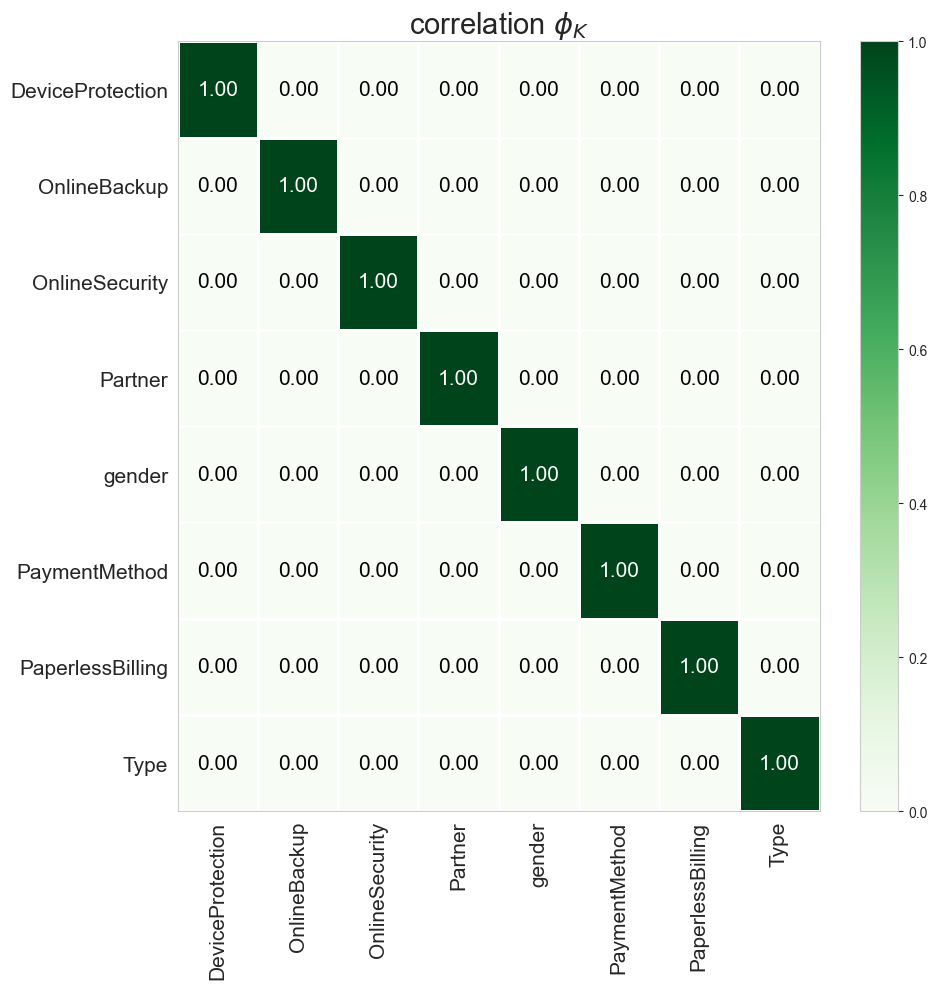

In [247]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 10))
plt.tight_layout();

<div class="alert alert-info"> <b>Юлия:</b>
Не понимаю, как интерпретировать выдачу VIF, Phi_K. Признаки оставила, как есть, для дальнейшего анализа.
</div>


<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> Пример использования <a href = "https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7">Phi_k</a></div>

<div class="alert alert-info"> <b>Юлия:</b>
Числовой признак исключила, матрицу построила.
</div>


### *Вывод:* Категориальных признаков с высокой мультиколлинеарностью в данных нет.

## 3 Модели

### 3.1 Деление выборки на подвыборки

```
- 75% train_data
- 25% test_data
```

In [176]:
data = df_filled.drop(columns='customerID').copy()

<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> Стоит удалить айди и даты из итогового датафрейма </div>

<div class="alert alert-info"> <b>Юлия:</b>
Построила.
</div>


In [179]:
data.columns

Index(['churned', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'begin_date', 'end_date', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [180]:
train_data, test_data = train_test_split(data, test_size=0.25, random_state=RANDOM_STATE)

print('Размер обучающей выборки:', train_data.shape[0])
print('Размер тестовой выборки:', test_data.shape[0])

Размер обучающей выборки: 5282
Размер тестовой выборки: 1761


### 3.2 Кодирование признаков (после деления выборки на подвыборки)

Есть несколько способов, как кодировать переменные:

- get_dummies()
- OHE
- OrdinalEncoding
- LabelEncoding

Мы не хотим увеличивать количество колонок, поэтому в рамках данного проекта выбираем способ *OrdinalEncoding()*.

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churned           7043 non-null   int64  
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   float64
 6   begin_date        7043 non-null   object 
 7   end_date          7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


### Признаки, которые необходимо кодировать (только категориальные):
```
'Type',
'PaperlessBilling',
'PaymentMethod',
'gender',
'Partner',
'Dependents',
'MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies'

```

In [183]:
# define ordinal encoding
ordinalencoder = OrdinalEncoder()

In [184]:
# transform data
result_train = ordinalencoder.set_params(encoded_missing_value=-1).fit_transform(train_data[['Type',
                                            'PaperlessBilling',
                                            'PaymentMethod',
                                            'gender',
                                            'Partner',
                                            'Dependents',
                                            'MultipleLines',
                                            'InternetService',
                                            'OnlineSecurity',
                                            'OnlineBackup',
                                            'DeviceProtection',
                                            'TechSupport',
                                            'StreamingTV',
                                            'StreamingMovies']])

result_train = pd.DataFrame(result_train)

print(type(result_train))
result_train.head(3)

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,2.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [185]:
# transform data
result_test = ordinalencoder.set_params(encoded_missing_value=-1).transform(test_data[['Type',
                                            'PaperlessBilling',
                                            'PaymentMethod',
                                            'gender',
                                            'Partner',
                                            'Dependents',
                                            'MultipleLines',
                                            'InternetService',
                                            'OnlineSecurity',
                                            'OnlineBackup',
                                            'DeviceProtection',
                                            'TechSupport',
                                            'StreamingTV',
                                            'StreamingMovies']])

result_test = pd.DataFrame(result_test)

print(type(result_train))
result_train.head(3)

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,2.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Кодирование и масштабирование признаков производится только после разбиения на трейн и тест, так же численные признаки не надо кодировать</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> Не совсем так, на трейне fit_transform, на тесте - transform</div>

<div class="alert alert-info"> <b>Юлия:</b>
Поправила.
</div>


In [186]:
# объединим закодированные колонки и наш основной датасет (с удаленными категориальными признаками)
train_enc = train_data.join(result_train)

In [187]:
# объединим закодированные колонки и наш основной датасет (с удаленными категориальными признаками)
test_enc = test_data.join(result_test)

In [188]:
# удалим колонки, которые хотим кодировать
train_dropped = train_enc.drop(['Type','PaperlessBilling',
                                            'PaymentMethod',
                                            'gender',
                                            'Partner',
                                            'Dependents',
                                            'MultipleLines',
                                            'InternetService',
                                            'OnlineSecurity',
                                            'OnlineBackup',
                                            'DeviceProtection',
                                            'TechSupport',
                                            'StreamingTV',
                                            'StreamingMovies'], axis=1)
train_dropped

,churned,MonthlyCharges,TotalCharges,begin_date,end_date,SeniorCitizen,0,1,2,3,4,5,6,7,8,9,10,11,12,13
4476,0,20.90,20.0,2019-09-01,2019-10-01,0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2474,1,106.35,4849.0,2016-03-01,2020-02-01,0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
6077,1,113.95,6891.0,2014-12-01,2020-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2263,0,98.15,567.0,2019-05-01,2019-11-01,0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6731,1,19.55,470.0,2018-02-01,2020-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,1,20.25,835.0,2016-08-01,2020-02-01,0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2251,1,69.35,712.0,2019-03-01,2020-02-01,0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1664,0,96.05,4399.0,2015-12-01,2019-10-01,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6787,1,109.95,3782.0,2017-03-01,2020-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
# удалим колонки, которые хотим кодировать
test_dropped = test_enc.drop(['Type','PaperlessBilling',
                                            'PaymentMethod',
                                            'gender',
                                            'Partner',
                                            'Dependents',
                                            'MultipleLines',
                                            'InternetService',
                                            'OnlineSecurity',
                                            'OnlineBackup',
                                            'DeviceProtection',
                                            'TechSupport',
                                            'StreamingTV',
                                            'StreamingMovies'], axis=1)
test_dropped

,churned,MonthlyCharges,TotalCharges,begin_date,end_date,SeniorCitizen,0,1,2,3,4,5,6,7,8,9,10,11,12,13
954,1,95.10,2162.0,2018-04-01,2020-02-01,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4096,1,89.40,1871.0,2018-06-01,2020-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1756,1,74.85,3268.0,2016-06-01,2020-02-01,1,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1250,1,103.20,5744.0,2015-06-01,2020-02-01,0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6742,1,79.20,4016.0,2015-10-01,2020-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,0,84.80,546.0,2019-03-01,2019-10-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,1,75.60,1395.0,2018-08-01,2020-02-01,0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2876,1,19.70,386.0,2018-07-01,2020-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3872,1,103.10,970.0,2019-05-01,2020-02-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
train_dropped.shape

(5282, 20)

In [191]:
test_dropped.shape

(1761, 20)

In [192]:
train_dropped.isna().sum()

churned              0
MonthlyCharges       0
TotalCharges         0
begin_date           0
end_date             0
SeniorCitizen        0
0                 1304
1                 1304
2                 1304
3                 1304
4                 1304
5                 1304
6                 1304
7                 1304
8                 1304
9                 1304
10                1304
11                1304
12                1304
13                1304
dtype: int64

In [193]:
test_dropped.isna().sum()

churned              0
MonthlyCharges       0
TotalCharges         0
begin_date           0
end_date             0
SeniorCitizen        0
0                 1323
1                 1323
2                 1323
3                 1323
4                 1323
5                 1323
6                 1323
7                 1323
8                 1323
9                 1323
10                1323
11                1323
12                1323
13                1323
dtype: int64

In [194]:
train_dropped = train_dropped.dropna()

In [195]:
test_dropped = test_dropped.dropna()

In [196]:
train_dropped.isna().sum()

churned           0
MonthlyCharges    0
TotalCharges      0
begin_date        0
end_date          0
SeniorCitizen     0
0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
dtype: int64

In [197]:
test_dropped.isna().sum()

churned           0
MonthlyCharges    0
TotalCharges      0
begin_date        0
end_date          0
SeniorCitizen     0
0                 0
1                 0
2                 0
3                 0
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12                0
13                0
dtype: int64

### 3.3 После кодирования категориальных переменных выделяем `X, y` для обучения и тестирования моделей

In [198]:
X_train = train_dropped.drop(['churned'], axis=1)
y_train = train_dropped['churned']

X_test = test_dropped.drop(['churned'], axis=1)
y_test = test_dropped['churned']

print('Обучающая выборка (признаки):', X_train.shape[0])
print('Обучающая выборка (таргет)', y_train.shape[0])
print()
print('Тестовая выборка (признаки):', X_test.shape[0])
print('Тестовая выборка (таргет)', y_test.shape[0])

Обучающая выборка (признаки): 3978
Обучающая выборка (таргет) 3978

Тестовая выборка (признаки): 438
Тестовая выборка (таргет) 438


### 3.4 Масштабирование признаков

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [204]:
X_train_n = X_train.drop(columns=['begin_date', 'end_date'])

In [205]:
X_test_n = X_test.drop(columns=['begin_date', 'end_date'])

In [206]:
# вычисляем минимум и максимум по обучающим данным
scaler_train = MinMaxScaler().fit(X_train_n)

In [207]:
# вычисляем минимум и максимум по тестовым данным
scaler_test = MinMaxScaler().fit(X_test_n)

In [208]:
# масштабируем обучающие данные
X_train_scaled = scaler_train.transform(X_train_n)

In [209]:
# масштабируем тестовые данные и оцениваем качество на масштабированных данных
X_test_scaled = scaler_test.transform(X_test_n)

### *Вывод:* Данные готовы для обучения моделей: пропуски заполнены, признаки проверены на мультиколлинеарность, выделены подвыборки (трейн, тест), выделен целевой признак, категориальные данные закодированы, числовые признаки приведены к единому масштабу.

## 4 Модели

### 4.4.1 Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [210]:
%%time
# Initiating and building Decision Tree model
parameters_dt = {
    'max_depth': [2, 3, 4, 5],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

dt = DecisionTreeClassifier()
grid_DT = GridSearchCV(dt, param_grid=parameters_dt)
best_decision_tree_model = grid_DT.fit(X_train_scaled, y_train)
print('Наилучшие параметры для Decision Tree: {}'.format(best_decision_tree_model.best_params_))

Наилучшие параметры для Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
CPU times: user 724 ms, sys: 20 ms, total: 744 ms
Wall time: 846 ms


### 4.4.2 Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [211]:
%%time
# Initiating and building Random Forest Regressor model
parameters_rf = {
    'n_estimators': [5, 10, 20],
    'max_depth': [3, 7, 9],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

rf_model = RandomForestClassifier()
grid_RF = GridSearchCV(estimator=rf_model, param_grid=parameters_rf)
best_random_forest_model = grid_RF.fit(X_train_scaled, y_train)
print('Наилучшие параметры для Random Forest: {}'.format(best_random_forest_model.best_params_))

Наилучшие параметры для Random Forest: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 20}
CPU times: user 6.43 s, sys: 121 ms, total: 6.55 s
Wall time: 7.13 s


### 4.4.3 Gradient Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

In [212]:
%%time
param_grid={'n_estimators':[5,10], 
            'learning_rate': [0.1,0.04,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 
n_jobs=4

estimator = GradientBoostingClassifier() 
gb_classifier = GridSearchCV(estimator=estimator, 
                          cv=5, 
                          param_grid=param_grid, 
                          n_jobs=n_jobs)
    
best_gb_model = gb_classifier.fit(X_train_scaled, y_train)
print('Наилучшие параметры для Gradient Descent: {}'.format(best_gb_model.best_params_))

Наилучшие параметры для Gradient Descent: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 10}
CPU times: user 226 ms, sys: 100 ms, total: 326 ms
Wall time: 6.41 s


In [213]:
print(best_gb_model.best_estimator_)

GradientBoostingClassifier(max_depth=4, max_features=1.0, min_samples_leaf=3,
                           n_estimators=10)


### 4.4.4 Сравнение качества моделей по кросс-валидации: 

- **Decision Tree**

In [214]:
best_score_dt = round(best_decision_tree_model.best_score_, 5)
print('Best score Decision Tree: {}'.format(best_score_dt))

Best score Decision Tree: 0.78029


In [215]:
train_predicted_dt = best_decision_tree_model.predict(X_train_scaled)
print("TRAIN Decision Tree Model, F1:", f1_score(y_train, train_predicted_dt))

TRAIN Decision Tree Model, F1: 0.8735888058514867


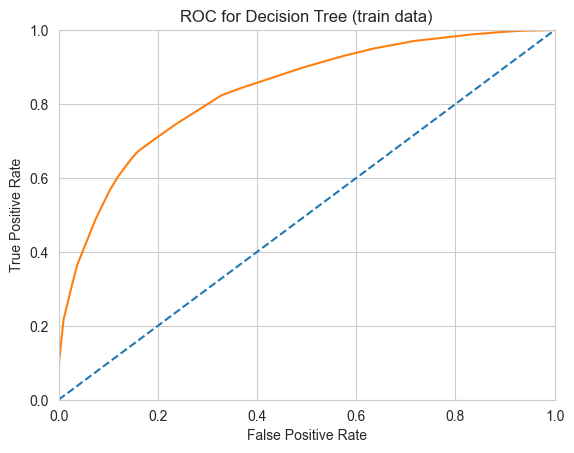

In [216]:
probabilities_train_dt = best_decision_tree_model.predict_proba(X_train_scaled)
probabilities_one_train_dt = probabilities_train_dt[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, probabilities_one_train_dt)

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

# < применим функции plt.xlim() и plt.ylim(), чтобы
#   установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC for Decision Tree (train data)')
plt.show();

In [217]:
auc_roc_dt = roc_auc_score(y_train, probabilities_one_train_dt)
print(f'Decision Tree // model 1 AUC score: {auc_roc_dt}')

Decision Tree // model 1 AUC score: 0.8343133481453336


- **Random Forest**

In [218]:
best_score_rf = round(best_random_forest_model.best_score_, 5)
print('Best score Random Forest: {}'.format(best_score_rf))

Best score Random Forest: 0.77728


In [219]:
train_predicted_rf = best_random_forest_model.predict(X_train_scaled)
print("TRAIN Random Forest Model, F1:", f1_score(y_train, train_predicted_rf))

TRAIN Random Forest Model, F1: 0.9186467348544454


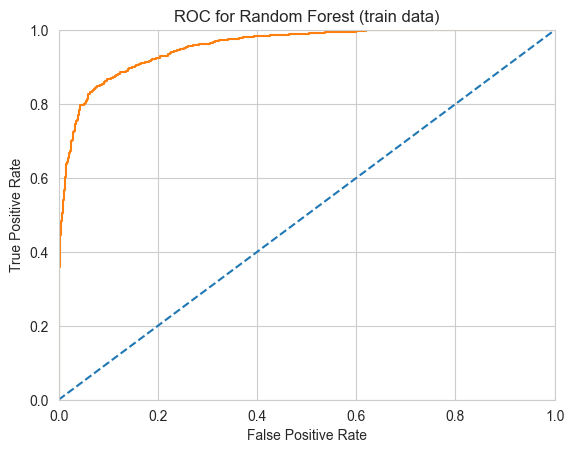

In [220]:
probabilities_train_rf = best_random_forest_model.predict_proba(X_train_scaled)
probabilities_one_train_rf = probabilities_train_rf[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, probabilities_one_train_rf)

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

# < применим функции plt.xlim() и plt.ylim(), чтобы
#   установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC for Random Forest (train data)')
plt.show();

In [221]:
auc_roc_rf = roc_auc_score(y_train, probabilities_one_train_rf)
print(f'Random Forest // model 1 AUC score: {auc_roc_rf}')

Random Forest // model 1 AUC score: 0.9550479462803433


- **Gradient Boosting**

In [223]:
best_score_gb = round(best_gb_model.best_score_, 5)
print('Best score Gradient Boosting: {}'.format(best_score_gb))

Best score Gradient Boosting: 0.78633


In [224]:
train_predicted_gb = best_random_forest_model.predict(X_train_scaled)
print("TRAIN Random Forest Model, F1:", f1_score(y_train, train_predicted_rf))

TRAIN Random Forest Model, F1: 0.9186467348544454


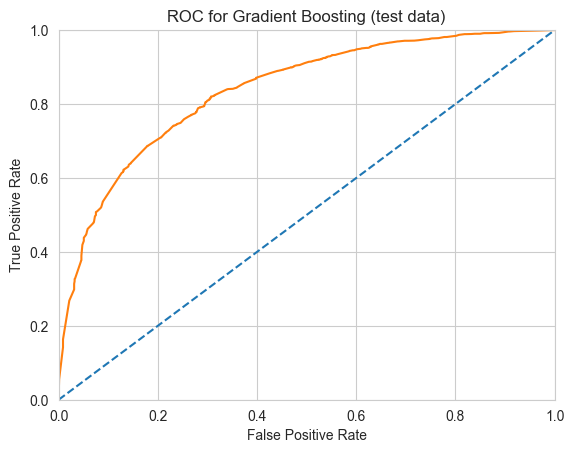

In [225]:
probabilities_train_gb = best_gb_model.predict_proba(X_train_scaled)
probabilities_one_train_gb = probabilities_train_gb[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, probabilities_one_train_gb)

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

# < применим функции plt.xlim() и plt.ylim(), чтобы
#   установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC for Gradient Boosting (test data)')
plt.show();

In [226]:
auc_roc_gb = roc_auc_score(y_train, probabilities_one_train_gb)
print(f'Gradient Boosting // model 1 AUC score: {auc_roc_gb}')

Gradient Boosting // model 1 AUC score: 0.8369449836049325


### *Вывод:* Наивысший скор по кросс-валидации получил градиентный бустинг.

## 5 Тестируем лучшую модель (gradient boosting) на тестовой выборке и делаем тестовые предсказания

### 5.1 Тестируем Gradient Boosting

In [227]:
test_predicted_gb = best_gb_model.predict(X_test_scaled)
print("TEST Gradient Boosting Model, F1:", f1_score(y_test, test_predicted_gb))

TEST Gradient Boosting Model, F1: 0.8531468531468532


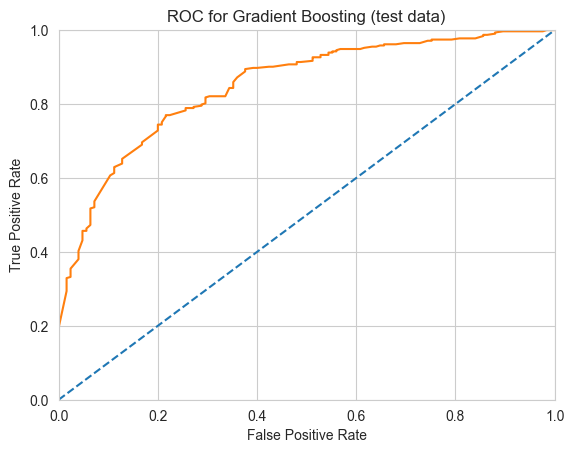

In [228]:
probabilities_test_gb = best_gb_model.predict_proba(X_test_scaled)
probabilities_one_test_gb = probabilities_test_gb[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test_gb)

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

# < применим функции plt.xlim() и plt.ylim(), чтобы
#   установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC for Gradient Boosting (test data)')
plt.show();

In [229]:
auc_roc_gb = roc_auc_score(y_test, probabilities_one_test_gb)
print(f'Gradient Boosting // model 1 AUC score: {auc_roc_gb}')

Gradient Boosting // model 1 AUC score: 0.8490734824281151


### *Вывод:* Модель градиентного бустинга показала наилучший результат. Модель слегка переобучается: на обучающей выборке AUC-ROC=0.85, на тестовой подвыборке AUC-ROC=0.82.

### 5.2 Предсказания

In [230]:
# Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test_scaled)
y_pred_gb

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [231]:
test_dropped.columns

Index([       'churned', 'MonthlyCharges',   'TotalCharges',     'begin_date',
             'end_date',  'SeniorCitizen',                0,                1,
                      2,                3,                4,                5,
                      6,                7,                8,                9,
                     10,               11,               12,               13],
      dtype='object')

In [233]:
# X_test_df = test_dropped.drop(columns=['target'])
test_pred = test_dropped[['MonthlyCharges',   
                          'TotalCharges',
                          'begin_date',       
                          'end_date',  
                          'SeniorCitizen']]

In [234]:
test_pred['churned'] = best_gb_model.predict(X_test_scaled)

In [235]:
test_pred['predictions'] = np.round(best_gb_model.predict_proba(X_test_scaled),3)[:, 1]
test_pred.shape

(438, 7)

In [236]:
test_pred_df = pd.DataFrame(test_pred)
test_pred_df

,MonthlyCharges,TotalCharges,begin_date,end_date,SeniorCitizen,churned,predictions
954,95.10,2162.0,2018-04-01,2020-02-01,0,1,0.664
1756,74.85,3268.0,2016-06-01,2020-02-01,1,1,0.763
1250,103.20,5744.0,2015-06-01,2020-02-01,0,1,0.800
1602,90.25,2755.0,2017-04-01,2019-10-01,0,1,0.674
767,20.40,275.0,2018-12-01,2020-02-01,0,1,0.848
...,...,...,...,...,...,...,...
889,100.55,6215.0,2014-07-01,2019-10-01,0,1,0.800
222,20.20,20.0,2020-01-01,2020-02-01,0,1,0.748
1731,69.60,69.0,2019-12-01,2020-01-01,1,0,0.390
428,75.60,1395.0,2018-08-01,2020-02-01,0,1,0.630


In [237]:
# test_pred_df.to_csv('/Users/yuliabezginova/PycharmProjects/00_files-for_NLP/test_pred_df.csv')

### 5.3 Изучим важность признаков

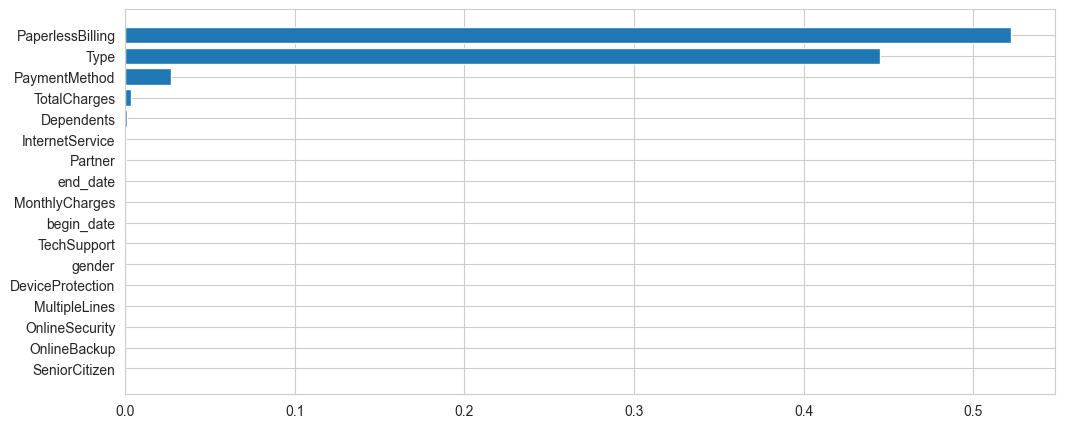

In [245]:
importance = best_gb_model.best_estimator_.feature_importances_
indices = np.argsort(importance)

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(test_data.drop(columns=['churned']).columns)[indices])

In [242]:
test_data.columns

Index(['churned', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'begin_date', 'end_date', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

### 5.4 Изучим, насколько хорошо модель классифицирует целевое значение

In [239]:
print(classification_report(y_test,best_gb_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.78      0.22      0.35       125
           1       0.76      0.97      0.85       313

    accuracy                           0.76       438
   macro avg       0.77      0.60      0.60       438
weighted avg       0.76      0.76      0.71       438



### *Вывод*: Модель градиентного бустинга показала наилучший результат. Модель слегка переобучается: на обучающей выборке AUC-ROC=0.85, на тестовой подвыборке AUC-ROC=0.82. Было выполнено тестирование модели градиентного бустинга на тестовой подвыборке и выявлена важность изучаемых признаков. По отчету о классификации (classification report) видим, что модель научилась хорошо предсказывать 1-й класс (F1-score=0.86) и хуже предсказывает 0-й класс (F1-score=0.46). Наиболее высокое влияние в модели оказывают признаки ```'PaperlessBilling'```, ```'Type'```, ```'PaymentMethod'```.

### *Часть 1 - Отчет для Сергея*

#### Проведите исследовательский анализ данных.
Готово.
#### Список уточняющих вопросов.
- 1) Что необходимо предсказать моделью: 
    - а) решаем задачу бинарной классификации: 0 - клиент уйдет, 1 - клиент не уйдет. Остальное - оставляем на усмотрение менеджмента, кому что предложить, чтобы удержать.
    - б) или скорее предсказать вероятность того, насколько клиент планирует уйти. Если этот вариант, то нужен совет, как это делать. Это будет задача классификации? Или можно, например, использовать предобученную нейронную сеть ResNet50, которую мы здесь проходили, с функцией softmax, которая как раз и предскажет вероятность?

#### Примерный план решения задачи. Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.
Прописала с начале блокнота в разделе **Методология проекта**.

#### Цель проекта
Прописала с начале блокнота.

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Ответы на вопросы: в данном случае у нас задача бинарной классификации </div>

<b>Итоговый комментарий ревьюера:
</b>  Молодец, хороший план, есть название и описание. Есть пара критических замечаний, которые необходимо исправить в первой части, а именно: 
1. Предустановка библиотек (phik)
2. Работоспособность кода(пропиши, пожалуйста, пути)
3. Комментарии к анализу
4. Округление total_charges
5. Заполнение пропусков<br>

Выше добавлены комментарии ко второй части. Также RANDOM_STATE необходимо прописать в константу.


### *Часть 2, 3 - Отчет для Сергея*

<div class="alert alert-info"> <b>Юлия:</b>
- Предустановка библиотек
Про библиотеки не до конца поняла. У вас каки-то пипы не установлены? Подскажите, пож-та, которые библиотеки надо предустановить.
    
- Работоспособность кода(пропиши, пожалуйста, пути)
Пути прописала через исключение. Код проверила, воспроизвелся вроде.
    
- Комментарии к анализу
Добавила выводы после каждого раздела.
   
- Округление total_charges
Проверила и оставила пояснение в работе.
    
- Заполнение пропусков
Заполнила, пояснения в работе оставила для каждого шага.
    
</div>

<b>Итоговый комментарий ревьюера:
</b> Молодец, 1 часть принята, замечания по 2 части:
1. Предустановка библиотек(phik)
2. Корреляция
3. Визуализация признаков
4. Пропуски
5. Кодирование признаков

<br> Выше оставил ссылку на использование phi_k. Так же при подборе гиперпараметров стоит прописать scoring



Precision: Out of all the players that the model predicted would get drafted, only 43% actually did.

Recall: Out of all the players that actually did get drafted, the model only predicted this outcome correctly for 36% of those players.

F1 Score: This value is calculated as:

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
F1 Score: 2 * (.43 * .36) / (.43 + .36)
F1 Score: 0.40.
Since this value isn’t very close to 1, it tells us that the model does a poor job of predicting whether or not players will get drafted.

Support: These values simply tell us how many players belonged to each class in the test dataset. We can see that among the players in the test dataset, 160 did not get drafted and 140 did get drafted.